In [153]:
# Imoorting packages

import pandas as pd
import numpy as np

In [154]:
# First look at the data

df = pd.read_csv('churn_data_before_processing.csv', index_col= 0)
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39.0,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,6,15574012,Chu,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822.0,France,Male,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
8,9,15792365,He,501.0,France,Male,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0
9,10,15592389,NaN,684.0,France,Male,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0


In [ ]:
# Droping useless Column

df.drop('RowNumber', axis = 1)

In [156]:
# Changing column names

df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [157]:
pd.set_option('display.max_rows', None)

## Eliminating duplicates

In [158]:
df.duplicated().sum()


104

In [160]:
df.drop_duplicates(subset= ["customerid"], inplace=True)

In [163]:
df.customerid.duplicated().any()

False

## CUSTOMER ID COLUMN

In [ ]:
# checking for type and missing values

print(type(df.customerid[0]))
df.customerid.isna().any()

<class 'numpy.int64'>


False

## SURNAME COLUMN

In [167]:
# Cheking for type and missing values

print(type(df.surname[0]))
print(df.surname.isna().any())
print(df.surname.isna().sum())

<class 'str'>
True
92


In [ ]:
# Creating a new category for missing values

#df.Surname.fillna('No information avilable', inplace= True)
#print(df.Surname.isna().any())

In [ ]:
# Frequency Table

df.surname.value_counts()

Smith                      32
Scott                      29
Martin                     29
Walker                     28
Brown                      26
Yeh                        25
Shih                       25
Genovese                   25
Maclean                    24
Wright                     24
Ma                         23
White                      23
Fanucci                    23
Wilson                     23
Lu                         22
Wang                       22
Moore                      22
Chu                        22
Johnson                    22
Sun                        21
McGregor                   21
Thompson                   21
Mai                        21
Watson                     20
Hughes                     20
Palerma                    20
Trevisani                  20
Miller                     20
Kao                        20
Kennedy                    20
Fang                       20
Jamieson                   20
Kerr                       20
Shen      

<AxesSubplot:>

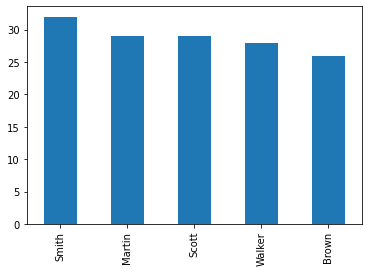

In [168]:
# Plotting the 5 most frequent names

most_freq_names = ['Smith', 'Martin', 'Scott', 'Walker', 'Brown']

df.loc[df.surname.isin(most_freq_names), 'surname'].value_counts().plot(kind= 'bar')

## CREDIT SCORE

In [169]:
# Checking for Type and Missing values

print(type(df.creditscore[0])) 
print(df.creditscore.isna().any())
print(df.creditscore.isna().sum())

<class 'numpy.float64'>
True
18


In [171]:
# Column description

print(df.creditscore.describe())
CS_median = df.creditscore.median()
print("median = %s" % CS_median)

count    9982.000000
mean      650.902076
std       100.409554
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max      2924.008649
Name: creditscore, dtype: float64
median = 652.0


<AxesSubplot:>

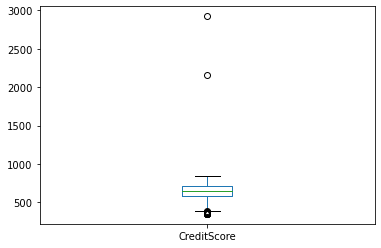

In [ ]:
#identifiying the outliers

df.CreditScore.plot( kind = 'box')

<AxesSubplot:ylabel='Frequency'>

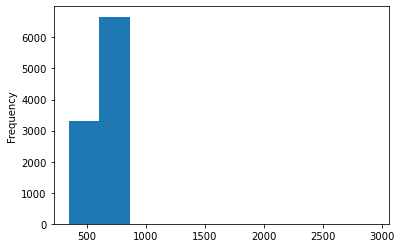

In [ ]:
df.CreditScore.plot( kind = 'hist')

In [ ]:
# values bigger than 1000 are outliers
# saving a version of the dataframe without the outliers

df_cleaned = df[df.CreditScore < 1000].copy()
df_cleaned.CreditScore.describe()

count    9980.000000
mean      650.523246
std        96.635399
min       350.000000
25%       584.000000
50%       652.000000
75%       718.000000
max       850.000000
Name: CreditScore, dtype: float64

<AxesSubplot:>

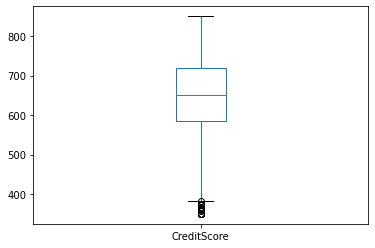

In [ ]:
# Box plot without the outliers

df_cleaned.CreditScore.plot(kind = 'box')

I looked it up and (based on the FICO ranking system) The maximum credit score is 850 which makes sense because without the two potential outliers the max credit score in our sample is 850 as well. Thus the two scores above 850 are definitevely outliers

In [ ]:
# Relacing missing values and outliers with Median
df.CreditScore.fillna(CS_median, inplace= True)
CS_median = df[df.CreditScore < 850]["CreditScore"].median()
df.loc[df.CreditScore > 850, "CreditScore"] = CS_median

In [ ]:
df.CreditScore.isna().any()

False

In [ ]:
assert max(df.CreditScore) == 850

## Geography Column

In [ ]:
# Checking for Type and missing values

print(type(df.Geography[0]))
print(df.Geography.isna().sum())

<class 'str'>
196


In [ ]:
# Creating a category for missing values

#df.Geography.fillna('No information available', inplace= True)

In [ ]:
# Frequency Table

df.Geography.value_counts()

France                      4941
Germany                     2463
Spain                       2446
No information available     196
Name: Geography, dtype: int64

In [ ]:
# idexing

<AxesSubplot:title={'center':'Geography Pie Chart'}, ylabel='Geography'>

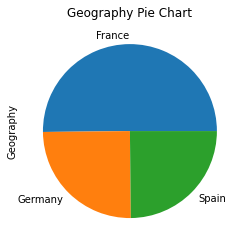

In [ ]:
# Plotting the Column values'frequencies

df.loc[df.Geography != 'No information available', 'Geography'].value_counts().plot(kind= 'pie', title = 'Geography Pie Chart')

<AxesSubplot:>

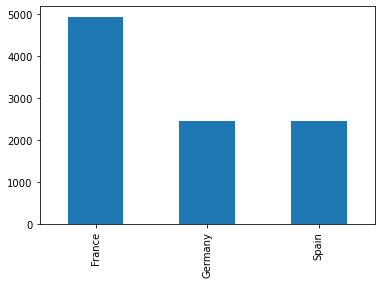

In [ ]:
df.loc[df.Geography != 'No information available', 'Geography'].value_counts().plot(kind= 'bar')

## Gender Column

In [ ]:
# Checking for type and missing values

print(type(df.Gender))
print(df.Gender.isna().sum())

<class 'pandas.core.series.Series'>
283


In [ ]:
# Creating new variable for missing values

df.Gender.fillna('No information available', inplace= True)

In [ ]:
# Frequnecy Table 

df.Gender.value_counts(dropna = False)

Male                        5323
Female                      4440
No information available     283
Name: Gender, dtype: int64

<AxesSubplot:ylabel='Gender'>

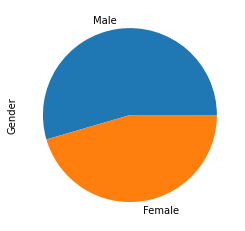

In [ ]:
# Plotting the frequencies

df.loc[df.Gender != 'No information available', 'Gender'].value_counts().plot(kind= 'pie')

<AxesSubplot:>

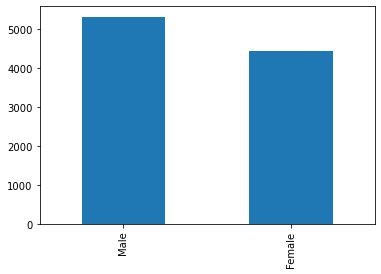

In [ ]:
df.loc[df.Gender != 'No information available', 'Gender'].value_counts().plot(kind= 'bar')

In [ ]:
# Checking for Type and missing values

print(type(df.Age[0]))
print(df.Age.isna().sum())

<class 'numpy.float64'>
271


In [ ]:
# Column Description

print(df.Age.describe())
median_Age = df.Age.median()
print("Median = %s" % median_Age)

count    9739.000000
mean       39.076291
std        13.736699
min       -49.000000
25%        32.000000
50%        37.000000
75%        44.000000
max       652.000000
Name: Age, dtype: float64
Median = 37.0


In [ ]:
# categorical or continous?

In [ ]:
median_Age = df.Age.median()
median_Age

37.0

In [ ]:
# Finding outliers

<AxesSubplot:>

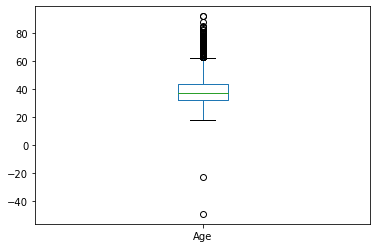

In [ ]:
df.Age.plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

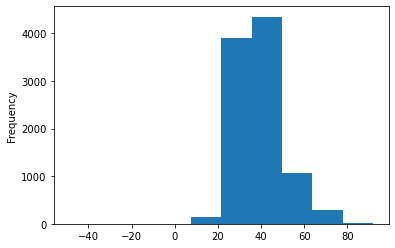

In [ ]:
df.Age.plot(kind= 'hist')

In [ ]:
# Negative values are ouliers
# Replacing outliers and missing values with median age

df.Age.fillna(median_Age, inplace= True)
median_age = df[df.age > 0]["Age"] = 
df.loc[df.Age < 0, 'Age'] = median_Age

In [ ]:
# Asserting that the minimum age is 18 years

assert df.Age.min() >= 18

In [ ]:
# Changing the type from float to integer

df['Age']  = df.Age.astype('int')
type(df.Age[0])

numpy.int32

## Tenure Column

Tenure is actually the lenght of the loan

In [ ]:
# Checking for type and missing values

print(type(df.Tenure[0]))
df.Tenure.isna().sum()

<class 'numpy.float64'>


78

In [ ]:
# Column description

print(df.Tenure.describe())
median_tenure = df.Tenure.median()
print( 'median = %s' %median_tenure)


count    9922.000000
mean        5.014316
std         2.905638
min        -5.000000
25%         3.000000
50%         5.000000
75%         7.000000
max        32.044103
Name: Tenure, dtype: float64
median = 5.0


<AxesSubplot:>

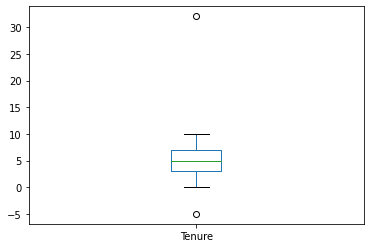

In [ ]:
# Finding outliers 

df.Tenure.plot(kind = 'box')

In [ ]:
df.loc[df.Tenure > 30, 'Age']

5204    33.0
Name: Age, dtype: float64

In [ ]:
# outliers are negatives values. The two values bigger than 30 as outliers as well because these two persons are only in their 30's.
# Replacing NA's and outliers with median

df[df.Tenure > 30] = median_tenure
df[df.Tenure < 0] = median_tenure


In [ ]:
assert min(df.Tenure) == 0 
assert max(df.Tenure) > 0 

<AxesSubplot:>

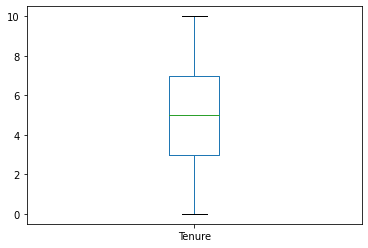

In [ ]:
df.Tenure.plot( kind = "box")

## Balance Column

In [ ]:
# Cheking for type and missing values 

print(type(df.Balance[0]))
df.Balance.isna().sum()

<class 'numpy.float64'>


156

In [ ]:
# Describe the column

print(df.Balance.describe())
median_balance = df.Balance.median()
print('Median = %s' %df.Balance.median())

count    9.850000e+03
mean     7.670732e+04
std      6.372795e+04
min      0.000000e+00
25%      0.000000e+00
50%      9.722152e+04
75%      1.276382e+05
max      1.036826e+06
Name: Balance, dtype: float64
Median = 97221.52


<AxesSubplot:>

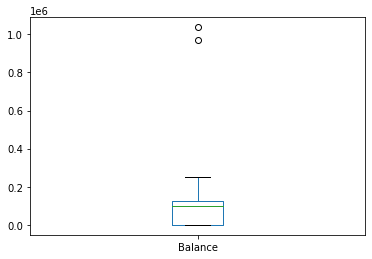

In [ ]:
# Finding Outliers 

df.Balance.plot(kind = 'box')

In [ ]:
df[df.Balance > 0.8e6]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2135,2136,15704284,Ekechukwu,736.0,Germany,Male,57.0,9.0,9.697802e+05,1.0,1.0,0.0,28434.44,1
5464,5465,15795540,Reye,556.0,France,Female,36.0,2.0,1.036826e+06,1.0,0.0,1.0,177670.57,0


In [ ]:
# look up estimated salary

<AxesSubplot:ylabel='Frequency'>

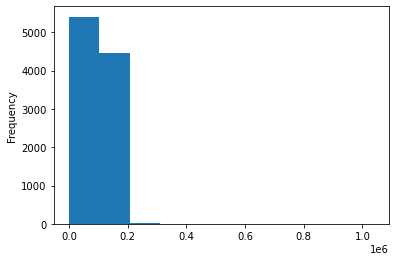

In [ ]:
df.Balance.plot(kind = 'hist')

In [ ]:
# Values bigger than 800 000 are potential outliers

## Number of products Column


In [ ]:
# Cheking for type and outliers

print(type(df.NumOfProducts))
df.NumOfProducts.isna().sum()

<class 'pandas.core.series.Series'>


288

In [ ]:
# Description

print(df.NumOfProducts.describe())
df.NumOfProducts.value_counts()

count    9758.000000
mean        1.528098
std         0.593187
min        -2.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        11.177460
Name: NumOfProducts, dtype: float64


 1.00000     4968
 2.00000     4470
 3.00000      256
 4.00000       58
-2.00000        3
-1.00000        2
 11.17746       1
Name: NumOfProducts, dtype: int64

<AxesSubplot:>

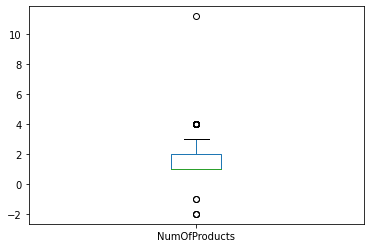

In [ ]:
# Finding outliers

df.NumOfProducts.plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

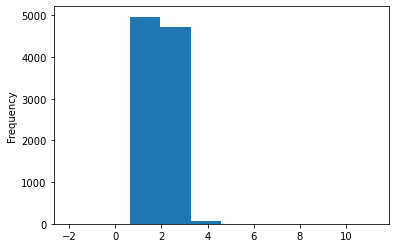

In [ ]:
df.NumOfProducts.plot(kind = 'hist')

In [ ]:
# Negative value are ouliers and 11.1176 is an oulier

## Has Credit Card Column

In [ ]:
# Checking for type and missing values

print(type(df.HasCrCard[0]))
df.HasCrCard.isna().sum()

<class 'numpy.float64'>


83

In [ ]:
# Frequency table

df.HasCrCard.value_counts(dropna = False)

1.0    7029
0.0    2934
NaN      83
Name: HasCrCard, dtype: int64

<AxesSubplot:>

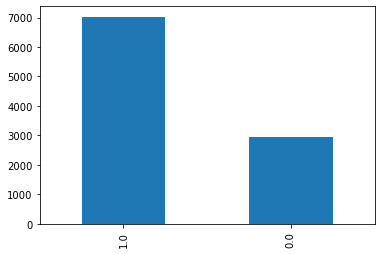

In [ ]:
# Plotting frequencies

df.HasCrCard.value_counts().plot(kind = 'bar')

<AxesSubplot:ylabel='HasCrCard'>

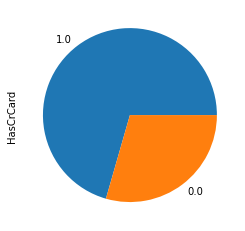

In [ ]:
df.HasCrCard.value_counts().plot(kind = 'pie')

## IS Active Member Column

In [ ]:
# Checking for type and missing values

print(type(df.IsActiveMember[0]))
df.IsActiveMember.isna().sum()

<class 'numpy.float64'>


87

In [ ]:
# Frequency table

df.IsActiveMember.value_counts(dropna = False)

1.0    5126
0.0    4833
NaN      87
Name: IsActiveMember, dtype: int64

<AxesSubplot:>

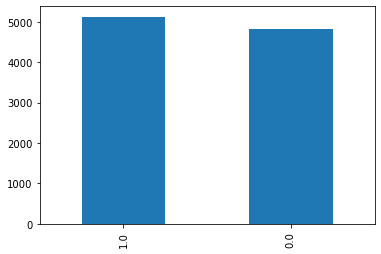

In [ ]:
# Plotting frequencies

df.IsActiveMember.value_counts().plot(kind = 'bar')

## Estimated Salary 

In [ ]:
# Checking for type and missing values

print(type(df.EstimatedSalary[0]))
df.EstimatedSalary.isna().sum()

<class 'numpy.float64'>


44

In [ ]:
# Description

print(df.EstimatedSalary.describe())
print('Median: ',df.EstimatedSalary.median())

count     10002.000000
mean     100079.821011
std       57489.484584
min          11.580000
25%       50983.750000
50%      100168.240000
75%      149370.550000
max      199992.480000
Name: EstimatedSalary, dtype: float64
Median:  100168.23999999999


<AxesSubplot:>

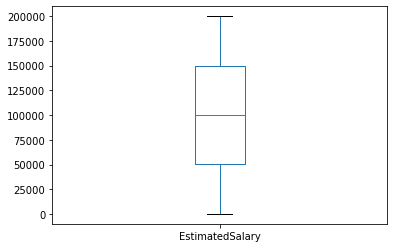

In [ ]:
# Finding Outliers

df.EstimatedSalary.plot(kind ='box')


<AxesSubplot:ylabel='Frequency'>

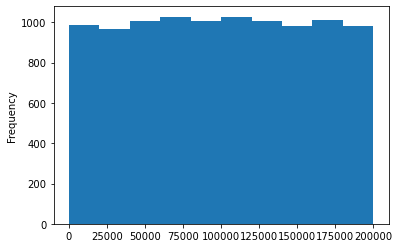

In [ ]:
df.EstimatedSalary.plot(kind ='hist')

In [ ]:
# doesn't seem to be any outliers 

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,0.00,1.0,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,0.00,2.0,0.0,NaN,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1.0,1.0,1.0,79084.10,0
